In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor

In [46]:
df = pd.read_csv('Sunspots_new.csv')

In [ ]:
df['Sunspot_lag12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['Sunspot_lag132'] = df['Monthly Mean Total Sunspot Number'].shift(132)
df['Diff_12Year'] = df['Monthly Mean Total Sunspot Number'].diff(periods=12)
df['Diff_1Year']=df['Monthly Mean Total Sunspot Number'].diff(periods=1)


df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df.dropna(inplace=True)

In [47]:
df['Sunspot_lag12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['Sunspot_lag132'] = df['Monthly Mean Total Sunspot Number'].shift(132)

In [48]:

features = ['Diff_1Year','Month','Month_sin','Month_cos','Year',
             'Diff_1Year','Sunspot_lag12','Sunspot_lag132']
X = df[features]
y = df['Monthly Mean Total Sunspot Number']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
model = LGBMRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1302
[LightGBM] [Info] Number of data points in the train set: 2549, number of used features: 8
[LightGBM] [Info] Start training from score 83.702903


LGBMRegressor(random_state=42)

In [52]:
y_pred = model.predict(X_test_scaled)

c:\Users\Monster\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [54]:
lines = df.plot.line(x='Year', y='Montlhy Mean Total Sunspot Number')

KeyError: 'Montlhy Mean Total Sunspot Number'

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print("🔹 LightGBM Sonuçları")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


🔹 LightGBM Sonuçları
R² Score: 0.8080
MSE: 889.18
MAE: 22.11


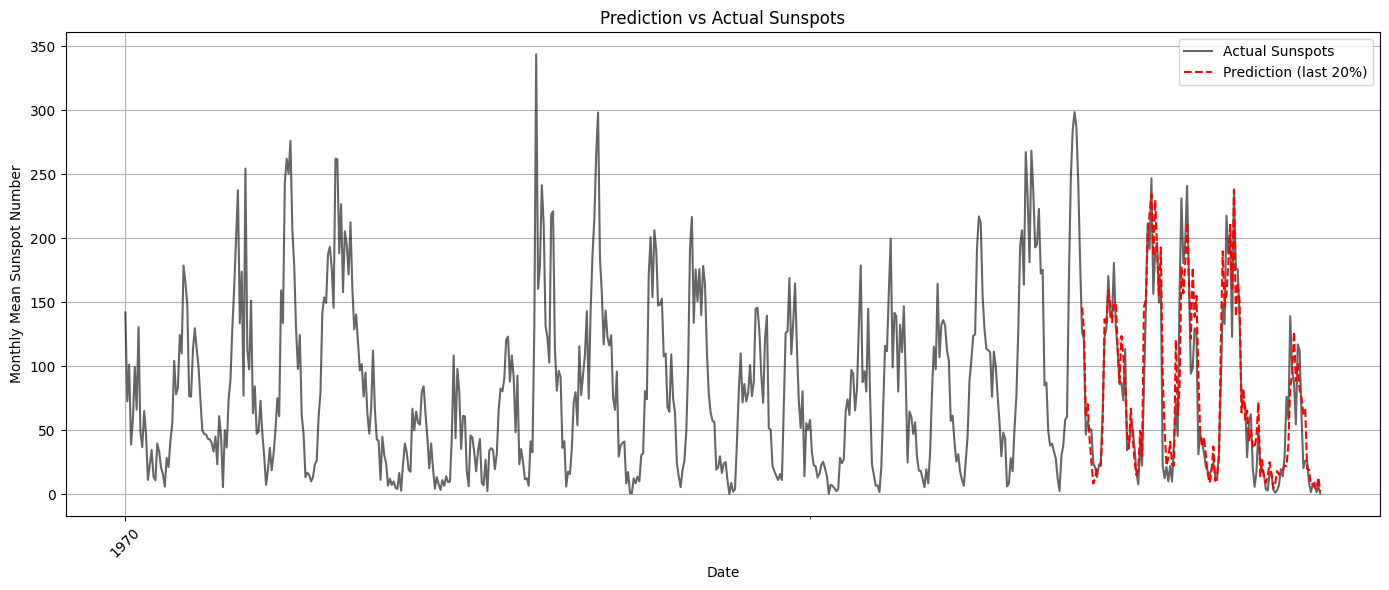

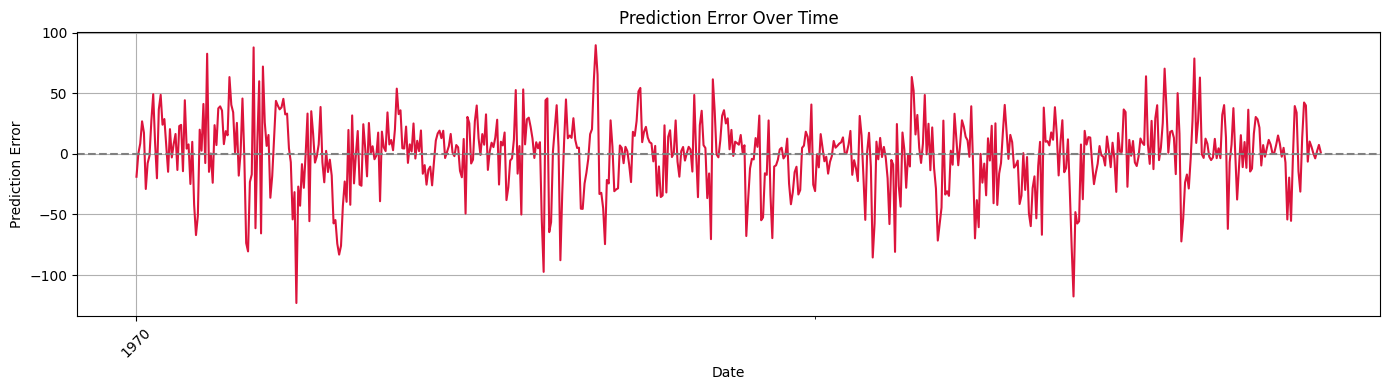

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

date_test = df.loc[y_test.index, 'Date']

plot_df = pd.DataFrame({
    'Date': date_test,
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values('Date')

plot_df['Error'] = plot_df['Predicted'] - plot_df['Actual']

plt.figure(figsize=(14, 6))
cut_index = int(len(plot_df) * 0.8)

plt.plot(plot_df['Date'], plot_df['Actual'], label='Actual Sunspots', color='black', alpha=0.6)
plt.plot(plot_df['Date'].iloc[cut_index:], plot_df['Predicted'].iloc[cut_index:], 
         label='Prediction (last 20%)', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Monthly Mean Sunspot Number')
plt.title('Prediction vs Actual Sunspots')

# Tarih eksenini yıllık olarak ayarla
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Her 5 yılda bir ana tick
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Her yıl için küçük tick
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)  # Tarihleri 45 derece döndür
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Hata grafiği
plt.figure(figsize=(14, 4))
plt.plot(plot_df['Date'], plot_df['Error'], color='crimson')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.title('Prediction Error Over Time')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


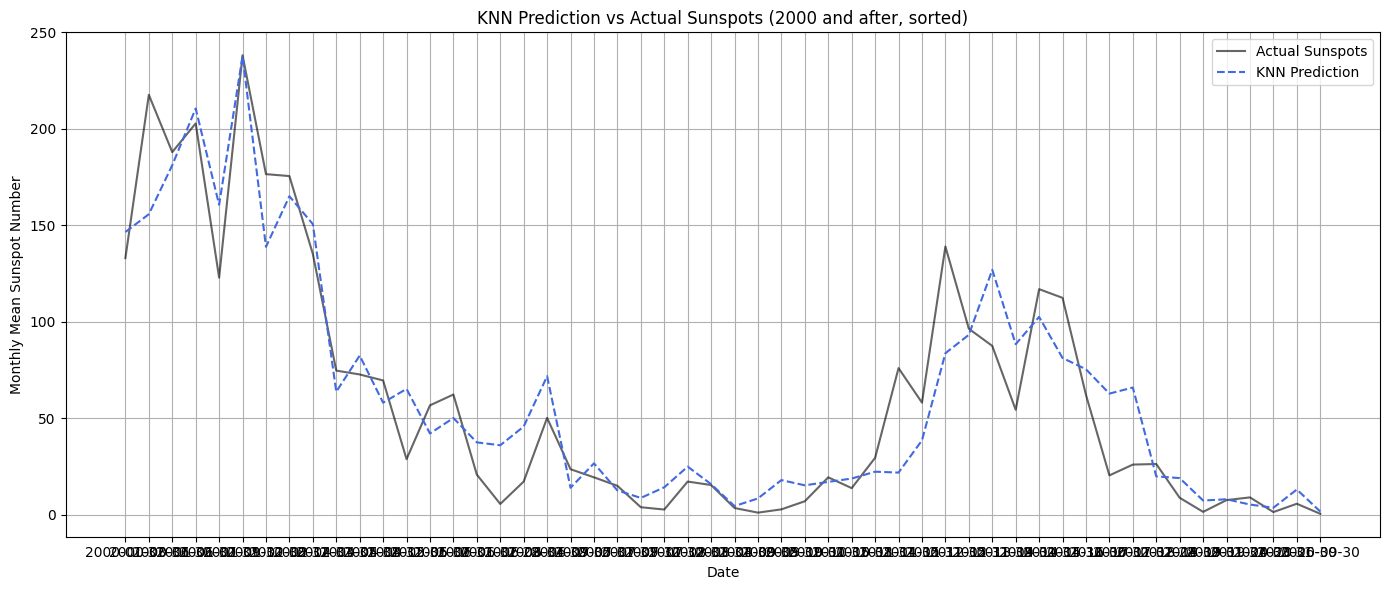

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 🔹 Tarih bilgilerini eşleştir
date_test = df.loc[y_test.index, 'Date']

# 🔹 DataFrame oluştur
plot_df = pd.DataFrame({
    'Date': date_test,
    'Actual': y_test,
    'Predicted': y_pred
})

# 🔹 Tarihe göre sırala
plot_df.sort_values('Date', inplace=True)

# 🔹 (Opsiyonel) 2000 sonrası filtre
plot_df = plot_df[plot_df['Date'] >= '2000-01-01']

# 🔹 Grafik çizimi
plt.figure(figsize=(14, 6))
plt.plot(plot_df['Date'], plot_df['Actual'], label='Actual Sunspots', color='black', alpha=0.6)
plt.plot(plot_df['Date'], plot_df['Predicted'], label='KNN Prediction', color='royalblue', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Sunspot Number')
plt.title('KNN Prediction vs Actual Sunspots (2000 and after, sorted)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: Boolean array expected for the condition, not object